# **EDA complementario de `business_yelp`**

In [ ]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
poblacion = pd.read_csv(r'florida_population.csv')
business = pd.read_csv(r'business_yelp.csv')

In [3]:
poblacion.head()

,Rank,City,Population
0,1,Jacksonville,"985,843"
1,2,Miami,"455,924"
2,3,Tampa,"403,364"
3,4,Orlando,"320,742"
4,5,St. Petersburg,"263,553"


In [4]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10927 non-null  int64  
 1   business_id   10927 non-null  object 
 2   name          10927 non-null  object 
 3   address       10801 non-null  object 
 4   city          10927 non-null  object 
 5   state         10927 non-null  object 
 6   postal_code   10924 non-null  float64
 7   latitude      10927 non-null  float64
 8   longitude     10927 non-null  float64
 9   stars         10927 non-null  float64
 10  review_count  10927 non-null  float64
 11  is_open       10927 non-null  float64
 12  attributes    10770 non-null  object 
 13  categories    10927 non-null  object 
 14  hours         9571 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.3+ MB


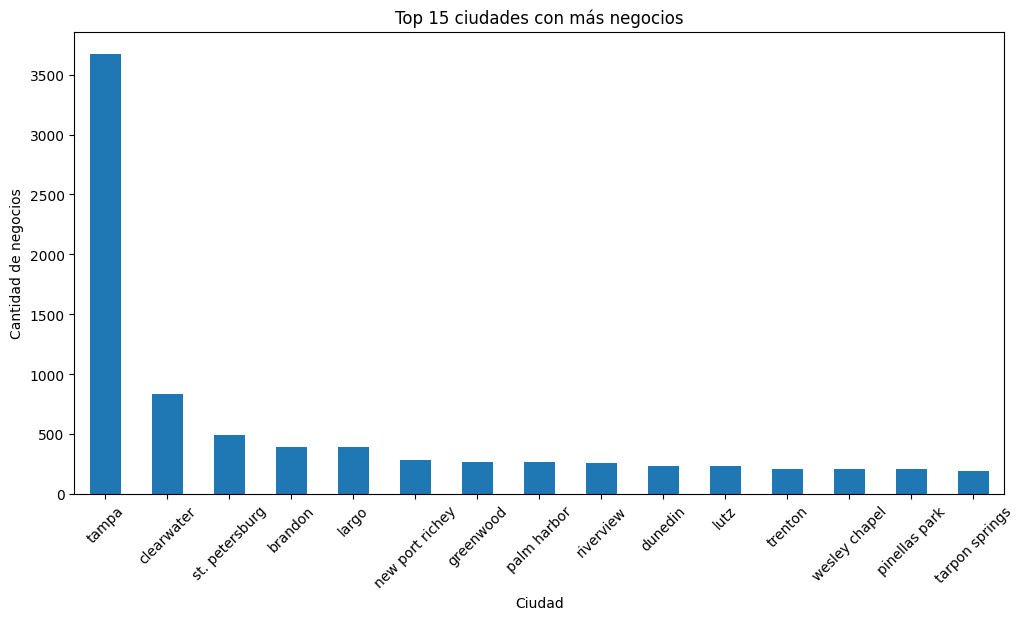

,City,Business Count
0,tampa,3673
1,clearwater,834
2,st. petersburg,488
3,brandon,395
4,largo,394
5,new port richey,282
6,greenwood,267
7,palm harbor,265
8,riverview,258
9,dunedin,236


In [5]:
# Contar la cantidad de negocios por ciudad
city_count = business['city'].value_counts()

# Mostrar las 15 ciudades con más negocios en un gráfico
plt.figure(figsize=(12, 6))
city_count[:15].plot(kind='bar')
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de negocios")
plt.title("Top 15 ciudades con más negocios")
plt.xticks(rotation=45)
plt.show()

# Mostrar la distribución en formato de tabla
city_df = city_count.reset_index()
city_df.columns = ['City', 'Business Count']
display(city_df.head(20))  # Muestra las 20 primeras ciudades en la tabla


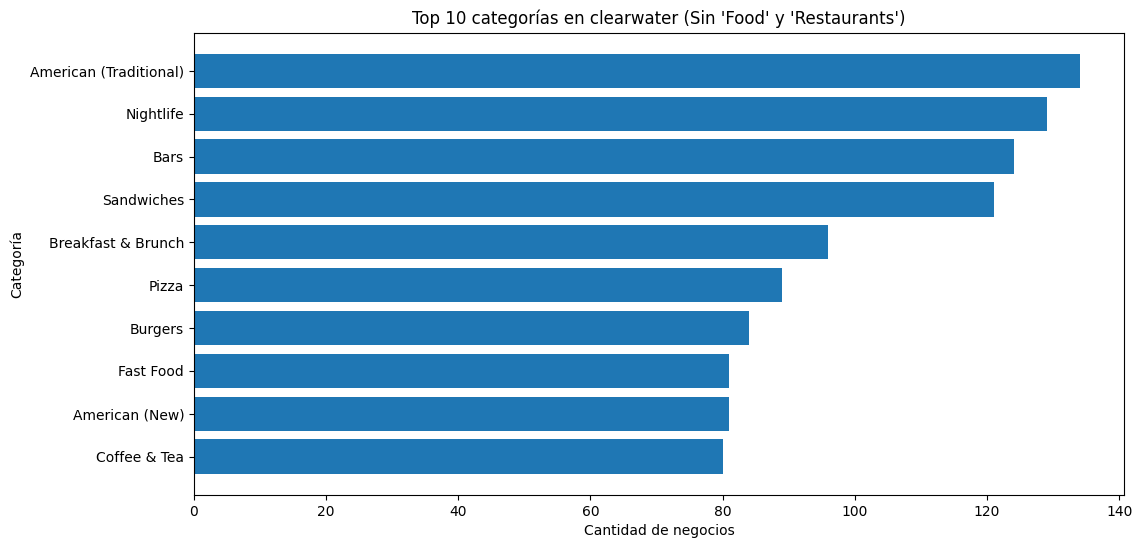

In [6]:
# Explode las categorías para separarlas en filas individuales
business_exploded = business.assign(categories=business['categories'].str.split(', ')).explode('categories')

# Filtrar para eliminar 'Food' y 'Restaurants'
business_exploded = business_exploded[~business_exploded['categories'].isin(['Food', 'Restaurants'])]

# Contar la cantidad de negocios por categoría y ciudad
category_city_count = business_exploded.groupby(['city', 'categories']).size().reset_index(name='count')

# Elegir una ciudad para visualizar (puedes cambiarla por otra)
ciudad_ejemplo = "clearwater"

# Filtrar por la ciudad seleccionada y ordenar por frecuencia
df_filtrado = category_city_count[category_city_count['city'] == ciudad_ejemplo].sort_values(by="count", ascending=False)

# Graficar las 10 categorías más comunes en la ciudad seleccionada
plt.figure(figsize=(12, 6))
plt.barh(df_filtrado['categories'][:10], df_filtrado['count'][:10])
plt.xlabel("Cantidad de negocios")
plt.ylabel("Categoría")
plt.title(f"Top 10 categorías en {ciudad_ejemplo} (Sin 'Food' y 'Restaurants')")
plt.gca().invert_yaxis()  # Para que la más frecuente aparezca arriba
plt.show()


Cantidad de ciudades después del merge: 949
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 953 non-null    object 
 1   city                 953 non-null    object 
 2   Population           176 non-null    float64
 3   business_count       953 non-null    float64
 4   business_per_capita  176 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.4+ KB
None


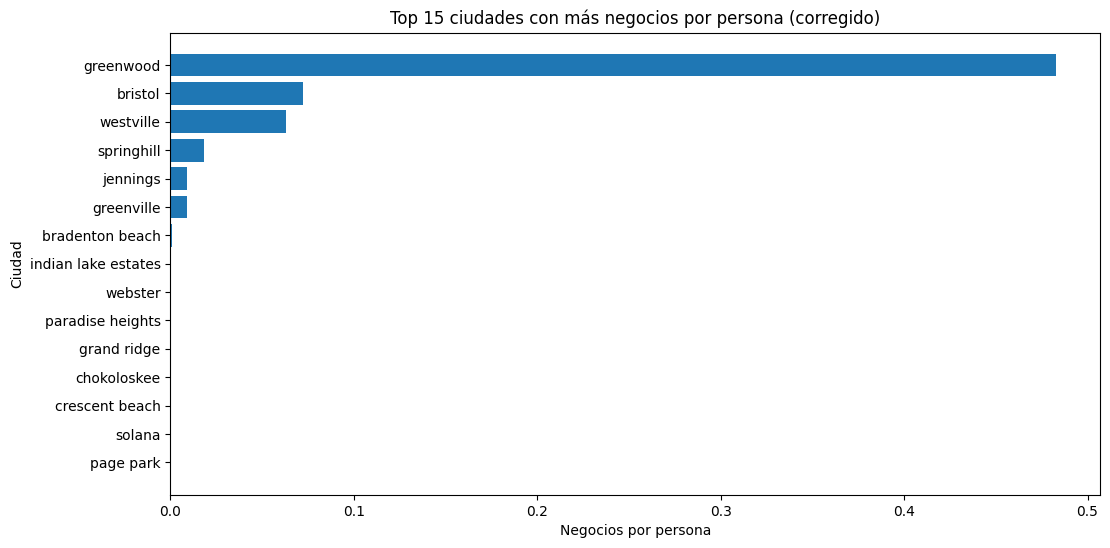

In [7]:
# Asegurar que 'city' en ambos DataFrames es tipo string y está limpio
if 'City' in poblacion.columns:
    poblacion = poblacion.rename(columns={"City": "city"})
poblacion['city'] = poblacion['city'].astype(str).str.strip().str.lower()
business['city'] = business['city'].astype(str).str.strip().str.lower()

# Convertir Population a numérico
poblacion['Population'] = pd.to_numeric(poblacion['Population'], errors='coerce')

# Contar negocios por ciudad
negocios_por_ciudad = business['city'].value_counts().reset_index()
negocios_por_ciudad.columns = ['city', 'business_count']

# Merge correcto: Asegurar que se mantengan todas las ciudades
df_merged = poblacion.merge(negocios_por_ciudad, on='city', how='left')

# Rellenar valores faltantes de negocios con 0 (ciudades sin negocios registrados)
df_merged['business_count'] = df_merged['business_count'].fillna(0)

# Calcular negocios per cápita
df_merged['business_per_capita'] = df_merged['business_count'] / df_merged['Population']

# Verificar la cantidad de ciudades en el nuevo df_merged
print("Cantidad de ciudades después del merge:", df_merged['city'].nunique())
print(df_merged.info())

# Graficar las 15 ciudades con más negocios per cápita
df_merged_sorted = df_merged.sort_values(by="business_per_capita", ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(df_merged_sorted['city'], df_merged_sorted['business_per_capita'])
plt.xlabel("Negocios por persona")
plt.ylabel("Ciudad")
plt.title("Top 15 ciudades con más negocios por persona (corregido)")
plt.gca().invert_yaxis()
plt.show()

## Distribución de categorías por ciudad y a nivel estatal

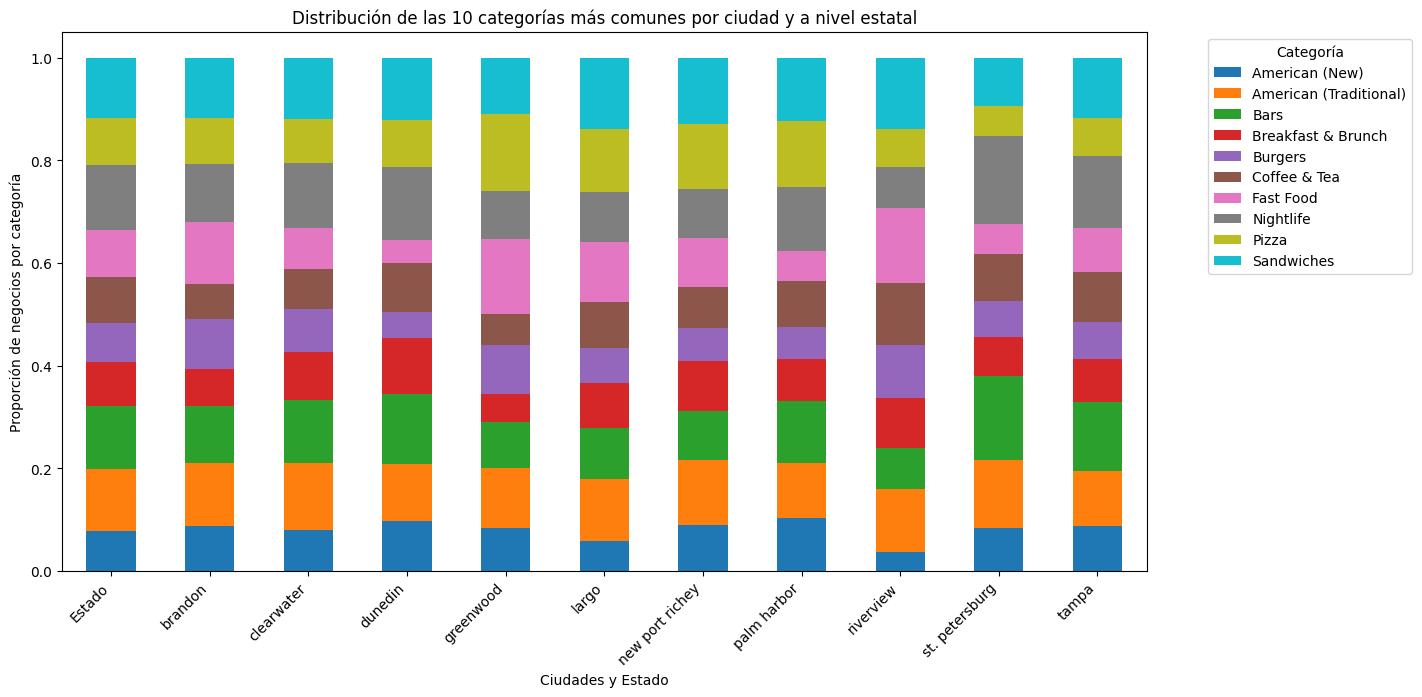

In [ ]:
# Explode las categorías para separar en filas individuales
business_exploded = business.assign(categories=business['categories'].str.split(', ')).explode('categories')

# Filtrar para eliminar 'Food' y 'Restaurants'
business_exploded = business_exploded[~business_exploded['categories'].isin(['Food', 'Restaurants'])]

# Obtener las 10 categorías más comunes en todo el dataset
top_categories = business_exploded['categories'].value_counts().head(10).index

# Filtrar solo las filas que pertenezcan a estas categorías top
business_top = business_exploded[business_exploded['categories'].isin(top_categories)]

# Contar negocios por categoría y ciudad
category_city_count = business_top.groupby(['city', 'categories']).size().reset_index(name='business_count')

# Unir con la población de cada ciudad
df_merged = category_city_count.merge(poblacion[['city', 'Population']], on='city', how='left')

# Calcular la proporción de negocios por categoría en cada ciudad
df_merged['category_proportion'] = df_merged['business_count'] / df_merged.groupby('city')['business_count'].transform('sum')

# Calcular la proporción promedio a nivel estado
category_state_count = business_top.groupby(['categories']).size().reset_index(name='business_count')

# Usar la población total de Florida
total_population_florida = poblacion['Population'].sum()
category_state_count['state_proportion'] = category_state_count['business_count'] / category_state_count['business_count'].sum()

# Crear una columna de referencia para el estado
category_state_count['city'] = 'Estado'

# Unir datos de estado con datos de ciudad
final_df = pd.concat([category_state_count[['city', 'categories', 'state_proportion']], 
                      df_merged[['city', 'categories', 'category_proportion']].rename(columns={'category_proportion': 'state_proportion'})], 
                     ignore_index=True)

# Seleccionar solo las 10 primeras ciudades con más negocios
top_cities = business['city'].value_counts().head(10).index
final_df = final_df[final_df['city'].isin(top_cities) | (final_df['city'] == 'Estado')]

# Pivotear para graficar
pivot_df = final_df.pivot(index='city', columns='categories', values='state_proportion').fillna(0)

# Graficar barras apiladas con proporción
fig, ax = plt.subplots(figsize=(14, 7))
pivot_df.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)

# Mejoras en la presentación
plt.ylabel("Proporción de negocios por categoría")
plt.title("Distribución de las 10 categorías más comunes por ciudad y a nivel estatal")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Ciudades y Estado")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

### Conclusiones sobre la distribución de categorías por ciudad y a nivel estatal

#### 1. Comparación entre ciudades y el estado
- La distribución de categorías en la columna "Estado" representa el promedio de todas las ciudades en Florida.
- Se observa que algunas ciudades tienen una mayor concentración de ciertas categorías en comparación con el promedio estatal.

#### 2. Variabilidad en la proporción de negocios
- Algunas categorías, como "Nightlife" y "Bars", tienen una representación más alta en ciertas ciudades en comparación con el promedio estatal.
- Categorías como "American (Traditional)" y "Pizza" se mantienen relativamente estables en todas las ciudades.

#### 3. Ciudades con particularidades en su distribución
- "Greenwood" muestra una proporción alta de negocios en la categoría "Fast Food", diferenciándose del resto.
- "Palm Harbor" y "St. Petersburg" tienen una mayor concentración de "Coffee & Tea" en comparación con el promedio estatal.
- "Dunedin" y "Clearwater" tienen una presencia equilibrada de varias categorías, sin un dominio claro de una en particular.